# Ensembles
es un grupo de predictores que trabajan de manera conjunta para mejorar el nivel de prediccion

# Boostrapping
es una tecnica que busca generar estimadores mas robustos para los parametro de una poblacion
Bostrapping agregattion = bagging
es como una especie de votacion, se generan varios predictores

# Random forest
varios arboles, someten a votacion de mayoría

# Tuneo de hiperparametros

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.model_selection as skms
import sklearn.metrics as skm
import sklearn.tree as sktree
import sklearn.datasets as skds
import sklearn.ensemble as skensemble

In [3]:
!wget https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv -O titanic.csv

--2021-06-07 15:41:57--  https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv
Resolving web.stanford.edu (web.stanford.edu)... 171.67.215.200, 2607:f6d0:0:925a::ab43:d7c8
Connecting to web.stanford.edu (web.stanford.edu)|171.67.215.200|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44225 (43K) [text/csv]
Saving to: ‘titanic.csv’

titanic.csv         100%[===================>]  43.19K  --.-KB/s    in 0.1s    

2021-06-07 15:41:57 (288 KB/s) - ‘titanic.csv’ saved [44225/44225]



In [4]:
data = pd.read_csv("titanic.csv")
data

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


In [5]:
data.pop("Name")
data["SexCode"]=0
data.loc[data["Sex"]=="male", ["SexCode"]]=1
data.pop("Sex")
data.head()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,SexCode
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1


In [9]:
xtrain, xtest, ytrain, ytest = skms.train_test_split(data.iloc[:,1:], data.iloc[:,0],
                                                     test_size=0.3, random_state=0)

In [10]:
modeloTree = sktree.DecisionTreeClassifier(random_state=0)
modeloTree.fit(xtrain,ytrain)
skm.accuracy_score(ytest,modeloTree.predict(xtest))

0.7790262172284644

In [11]:
modeloTreeOpt = sktree.DecisionTreeClassifier(random_state=0, max_depth=9)
modeloTreeOpt.fit(xtrain,ytrain)
skm.accuracy_score(ytest,modeloTreeOpt.predict(xtest))

0.8202247191011236

In [ ]:
modeloRF = skensemble.RandomForestClassifier(oob_score=True, random_state=0, verbose=2 )
modeloRF.fit(xtrain, ytrain)

In [13]:
modeloRF.oob_score_

0.8064516129032258

In [15]:
skm.accuracy_score(ytest, modeloRF.predict(xtest))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


0.8089887640449438

In [17]:
modeloRF = skensemble.RandomForestClassifier(oob_score=True, max_depth=9, random_state=0, verbose=0)
modeloRF.fit(xtrain, ytrain)
skm.accuracy_score(ytest, modeloRF.predict(xtest))

0.8389513108614233

In [19]:
params = {
    "n_estimators": list(range(10,101,10)),
    "max_depth": list(range(2,10)),
    "max_features": list(range(1,7))
}
params

{'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
 'max_features': [1, 2, 3, 4, 5, 6],
 'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}

In [21]:
modeloRFOpt = skms.GridSearchCV(
    estimator = skensemble.RandomForestClassifier(oob_score=True, random_state=0),
    verbose=10,
    n_jobs=-1,
    param_grid = params
)
modeloRFOpt

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=True, random_state=0,
                                 

In [22]:
modeloRFOpt.fit(xtrain, ytrain)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1993s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 122 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done 152 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done 182 tas

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=True, random_state=0,
                                 

In [23]:
skm.accuracy_score(ytest, modeloRFOpt.predict(xtest))

0.8389513108614233

In [24]:
RF = modeloRFOpt.best_estimator_
RF.oob_score_

0.8354838709677419

In [25]:
modeloRFOpt.best_params_

{'max_depth': 8, 'max_features': 3, 'n_estimators': 50}

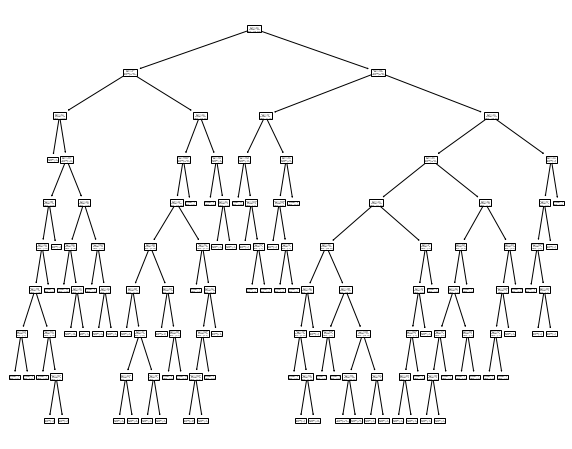

In [26]:
plt.figure(figsize=(10,8))
_ = sktree.plot_tree(modeloRF.estimators_[0])

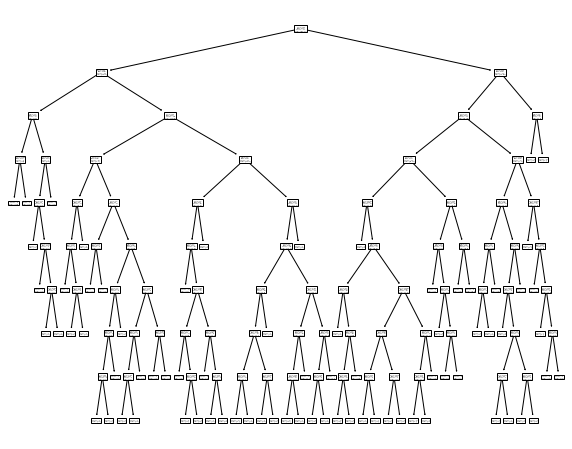

In [ ]:
plt.figure(figsize=(10,8))
_ = sktree.plot_tree(modeloRF.estimators_[10])

# AdaBoosting

In [27]:
modeloAdaboost = skensemble.AdaBoostClassifier(random_state=0)
modeloAdaboost.fit(xtrain,ytrain)
skm.accuracy_score(ytest, modeloAdaboost.predict(xtest))

0.8052434456928839

In [29]:
params = {
    "n_estimators": list (range(10,101,10)),
    "learning_rate":np.linspace(0.0001,1,100),
}
modeloAdaboostOpt = skms.GridSearchCV(
    estimator = skensemble.AdaBoostClassifier(random_state=0),
    param_grid = params,
    verbose =10,
    n_jobs = -1
)
modeloAdaboostOpt

GridSearchCV(cv=None, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=0),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': array([1.000e-04, 1.020e-02, 2.030e-02, 3.040e-02, 4.050e-02, 5.060e-02,
       6.070e-02, 7.080e-02, 8.090e-02, 9.100e-02, 1.011e-01, 1.112e-01,
       1.213e-01, 1....
       7.879e-01, 7.980e-01, 8.081e-01, 8.182e-01, 8.283e-01, 8.384e-01,
       8.485e-01, 8.586e-01, 8.687e-01, 8.788e-01, 8.889e-01, 8.990e-01,
       9.091e-01, 9.192e-01, 9.293e-01, 9.394e-01, 9.495e-01, 9.596e-01,
       9.697e-01, 9.798e-01, 9.899e-01, 1.000e+00]),
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100]},
             pre_dispatch='2*n_jobs', refit=T

In [ ]:
modeloAdaboostOpt.fit(xtrain,ytrain)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0371s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1291s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  36 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done 208 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done 252 tasks      | elapsed:   19.3s
[Parallel(n_jobs=-1)]: Done 304 tasks      | elapsed:   23.2s
[Parallel(n_jobs=-1)]: Done 356 tasks      | elapsed:   27.1s
[Parallel(n_jo

In [ ]:
modeloAdaboostOpt.best_params_

{'learning_rate': 0.7373999999999999, 'n_estimators': 30}

In [ ]:
skm.accuracy_score(ytest, modeloAdaboostOpt.predict(xtest))

0.797752808988764

# Modelo Gradient Boost

In [ ]:
modeloGboost = skensemble.GradientBoostingClassifier()
modeloGboost.fit(xtrain,ytrain)
skm.accuracy_score(ytest, modeloGboost.predict(xtest))

0.8239700374531835

In [ ]:
skensemble.GradientBoostingClassifier()
params={
    "learning_rate": np.linspace(0.001,1,10),
    "n_estimators": list (range(10, 101, 10)),
    "max_depth": range(2,6)
}

In [ ]:
modeloGboostOpt = skms.GridSearchCV(
    estimator = skensemble.GradientBoostingClassifier(random_state=0),
    param_grid = params,
    verbose =10,
    n_jobs = -1
)
modeloGboostOpt

In [ ]:
modeloGboostOpt.fit(xtrain,ytrain)

In [ ]:
skm.accuracy_score(ytest, modeloGboostOpt.predict(xtest))

0.8127340823970037

In [ ]:
modeloGboostOpt.best_params_

{'learning_rate': 0.334, 'max_depth': 3, 'n_estimators': 10}